Побудувати моделi класифiкацiї на основi методу опорних векторiв:
• Моделi sklearn.svm.LinearSVC та SVC(kernel="linear") з лiнiйним
ядром, встановити велике значення параметра С. При використаннi

LinearSVC звернути увагу, що навчальнi данi мають бути попере-
дньо масштабованi i центрованi.

• Моделi з лiнiйним ядром i меншими значеннями параметра С для
даних, якi частково перетинаються.
• Моделi SVC(kernel="poly") з полiномiальними ядрами. Дослiдити

рiзнi ступенi degree та гiперпараметр coef0 - управляє тим, наскiль-
ки сильно полiноми високого ступеня впливають на модель порiв-
няно з полiномами низького ступеня.

• Моделi SVC(kernel="rbf") з ядром "гаусiвська радiальна базисна
функцiя". Розглянути рiзнi комбiнацiї гiперпараметрiв gamma i C,
такi як: gamma=0.1 i C=0.01; gamma=0.1 i C=1; gamma=0.1 i C=100;
gamma=10 i C=0.01; gamma=10 i C=1; gamma=10 i C=100.
Збiльшення gamma призводить до стиснення дзвоноподiбної кривої,
в результатi вплив кожного прикладу зменшується; границя рiшень

бiльше звивається навколо окремих прикладiв. Невелике значен-
ня gamma робить границю рiшень бiльш гладкою. Гiперпараметр

gamma дiє як регуляризатор: при перенавчаннi слiд зменшити зна-
чення gamma.

• Настроїти гiперпараметри С та degree за допомогою решiтчастого
пошуку.


In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
dataset = pd.read_csv('dataset.csv')
dataset.describe(include='all')
dataset.isnull().sum()
#droping not required records(not needed columns)
dataset.dropna(inplace=True)
dataset.drop(['URL', 'CONTENT_LENGTH', 'CHARSET', 'SERVER', 'WHOIS_COUNTRY',
             'WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis=1, inplace=True)
print(dataset.isnull().sum())

URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64


In [2]:
dataset.describe()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,9.670000e+02,967.000000,967.000000,967.000000,967.000000
mean,55.560496,10.808687,16.964840,3.469493,3.188211,1720.409514,19.352637,19.382627,1.702195e+04,1904.967942,19.352637,2.380558,0.109617
std,25.572456,4.124311,45.139866,6.889008,3.369843,3925.800938,46.072438,50.036140,7.942383e+04,4017.962471,46.072438,2.821823,0.312574
min,16.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,39.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,49.000000,10.000000,8.000000,0.000000,2.000000,762.000000,10.000000,10.000000,8.220000e+02,880.000000,10.000000,0.000000,0.000000
75%,66.500000,12.000000,22.000000,4.000000,5.000000,2332.500000,26.000000,25.000000,9.382000e+03,2765.500000,26.000000,4.000000,0.000000
max,249.000000,43.000000,1194.000000,58.000000,17.000000,99843.000000,1198.000000,1284.000000,2.060012e+06,100151.000000,1198.000000,20.000000,1.000000


In [3]:
dataset['Type'].value_counts()

0    861
1    106
Name: Type, dtype: int64

In [4]:
df_centered = dataset.apply( lambda x: x-x.mean())
df_centered.describe().applymap("{0:.5f}".format)

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,967.00000,967.00000,967.00000,967.00000,967.00000,967.00000,967.00000,967.00000,967.00000,967.00000,967.00000,967.00000,967.00000
mean,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000
std,25.57246,4.12431,45.13987,6.88901,3.36984,3925.80094,46.07244,50.03614,79423.83367,4017.96247,46.07244,2.82182,0.31257
min,-39.56050,-4.80869,-16.96484,-3.46949,-3.18821,-1720.40951,-19.35264,-19.38263,-17021.94623,-1904.96794,-19.35264,-2.38056,-0.10962
25%,-16.56050,-2.80869,-16.96484,-3.46949,-3.18821,-1720.40951,-19.35264,-19.38263,-17021.94623,-1904.96794,-19.35264,-2.38056,-0.10962
50%,-6.56050,-0.80869,-8.96484,-3.46949,-1.18821,-958.40951,-9.35264,-9.38263,-16199.94623,-1024.96794,-9.35264,-2.38056,-0.10962
75%,10.93950,1.19131,5.03516,0.53051,1.81179,612.09049,6.64736,5.61737,-7639.94623,860.53206,6.64736,1.61944,-0.10962
max,193.43950,32.19131,1177.03516,54.53051,13.81179,98122.59049,1178.64736,1264.61737,2042990.05377,98246.03206,1178.64736,17.61944,0.89038


In [5]:
import seaborn as sns
#min max normalization
df_norm = (dataset-dataset.min())/(dataset.max()-dataset.min())
df_norm.describe().applymap("{0:.5f}".format)

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,967.00000,967.00000,967.00000,967.00000,967.00000,967.00000,967.00000,967.00000,967.00000,967.00000,967.00000,967.00000,967.00000
mean,0.16979,0.12996,0.01421,0.05982,0.18754,0.01723,0.01615,0.01510,0.00826,0.01902,0.01615,0.11903,0.10962
std,0.10975,0.11147,0.03781,0.11878,0.19823,0.03932,0.03846,0.03897,0.03856,0.04012,0.03846,0.14109,0.31257
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.09871,0.05405,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,0.14163,0.10811,0.00670,0.00000,0.11765,0.00763,0.00835,0.00779,0.00040,0.00879,0.00835,0.00000,0.00000
75%,0.21674,0.16216,0.01843,0.06897,0.29412,0.02336,0.02170,0.01947,0.00455,0.02761,0.02170,0.20000,0.00000
max,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [6]:
Y = dataset['Type']
X = dataset.drop(['Type'], axis='columns')

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = \
    train_test_split(X, Y,
                     test_size=0.20,
                     stratify=Y,
                     random_state=1)

In [10]:
#scaled
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaler = sc.fit(X_train)
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [11]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(max_iter=300, activation='relu', solver='adam', random_state=1)

In [12]:
#train first MLP
mlp_clf.fit(x_train_scaled, Y_train)

d:\anaconda_\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1)

In [13]:
from sklearn.metrics import accuracy_score
y_pred = mlp_clf.predict(x_test_scaled)
print ('Accuracy: {:.2f}'.format(accuracy_score(Y_test, y_pred)))

Accuracy: 0.96


d:\anaconda_\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


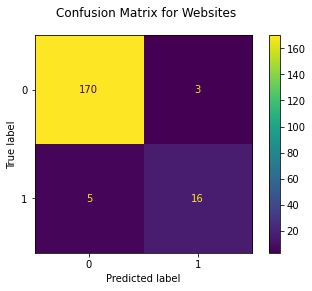

In [15]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
fig = plot_confusion_matrix(mlp_clf, x_test_scaled, Y_test, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for Websites")
plt.show()

In [16]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       173
           1       0.84      0.76      0.80        21

    accuracy                           0.96       194
   macro avg       0.91      0.87      0.89       194
weighted avg       0.96      0.96      0.96       194



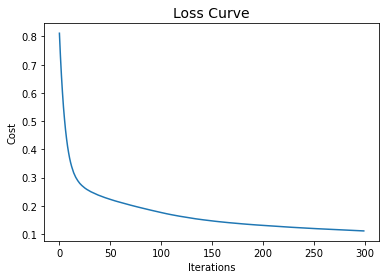

In [17]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

Висновок

Для цього набору даних одношарової моделі також достатньо, адже значення accuracy_score також досить близьке до 1.